Project Name : Olympics Data Analysis (1896 Summer Olympics)
Objective :

Here are some objectives you might consider for analyzing the 1896 Summer Olympics data:

Medal Distribution Analysis:

To examine the overall distribution of medals by country, identifying which countries were most successful in the 1896 Olympics.
Participation Insights:

To analyze athlete participation by country and sport, highlighting the diversity and representation of different nations and how many athletes competed in various events.
Gender Participation Examination:

To assess the level of female participation in the Olympics, understanding the historical context of gender representation in sports during that era.
Event Popularity Assessment:

To determine the most popular events based on the number of participants, identifying which sports attracted the highest level of competition and interest.
Gold Medal Analysis:

To analyze the sports with the maximum number of gold medals awarded, providing insights into which sports were most competitive and valuable in terms of achievements.
Top Athletes Identification:

To identify the athletes who won the most medals, highlighting individual performances and contributions to their respective countries’ success.
Historical Contextualization:

To place the 1896 Olympics in a broader historical context, analyzing how this event shaped the future of international sports and Olympic movements.###

In [17]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

# MySQL Connection

In [6]:
mydb = mysql.connector.connect(host="localhost",user="root",password="Prem@13kadam",database="Olympics") # connect the mysql Database
mycursor = mydb.cursor() # create cursor that allows to interact with the database
mycursor.execute("SELECT * FROM OlympicResults") # execute is to execute the mySQL
myresult = mycursor.fetchall()
dataset = pd.DataFrame(myresult, columns=[col[0] for col in mycursor.description])
print(dataset.head())

   Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver  


In [7]:
 # list of last five rows
 
 dataset.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
146,1896,Athens,Weightlifting,Weightlifting,"JENSEN, Viggo",DEN,Men,Heavyweight - Two Hand Lift,Gold
147,1896,Athens,Weightlifting,Weightlifting,"ELLIOTT, Launceston",GBR,Men,Heavyweight - Two Hand Lift,Silver
148,1896,Athens,Wrestling,Wrestling Gre-R,"CHRISTOPOULOS, Stephanos",GRE,Men,Open Event,Bronze
149,1896,Athens,Wrestling,Wrestling Gre-R,"SCHUMANN, Carl",GER,Men,Open Event,Gold
150,1896,Athens,Wrestling,Wrestling Gre-R,"TSITAS, Georgios",GRE,Men,Open Event,Silver


In [10]:
# shape

dataset.shape

(151, 9)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        151 non-null    int64 
 1   City        151 non-null    object
 2   Sport       151 non-null    object
 3   Discipline  151 non-null    object
 4   Athlete     151 non-null    object
 5   Country     151 non-null    object
 6   Gender      151 non-null    object
 7   Event       151 non-null    object
 8   Medal       151 non-null    object
dtypes: int64(1), object(8)
memory usage: 10.7+ KB


In [13]:
#the number of unique users and items in the dataset.
dataset.nunique()

Year           1
City           1
Sport          9
Discipline    10
Athlete       94
Country       11
Gender         1
Event         43
Medal          3
dtype: int64

In [16]:
# checking for missing values
dataset.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [15]:
# Check Column Names
print(dataset.columns)


Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')


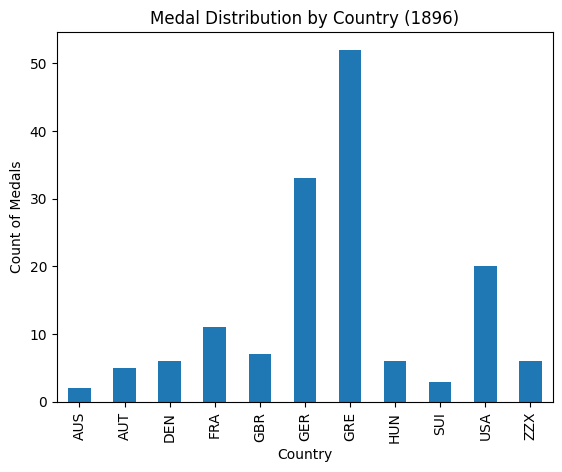

In [13]:
# Count the number of medals won by each country
medal_counts = dataset.groupby('Country')['Medal'].count()

# Plotting the medal distribution
medal_counts.plot(kind='bar', title='Medal Distribution by Country (1896)', ylabel='Count of Medals', xlabel='Country')
plt.show()


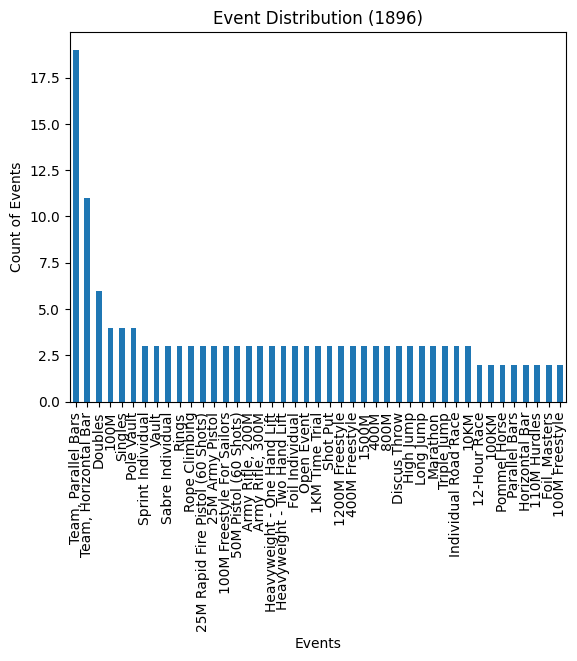

In [15]:
# Assuming your dataset has an 'event' column
event_counts = dataset['Event'].value_counts()

# Plotting the event distribution
event_counts.plot(kind='bar', title='Event Distribution (1896)', ylabel='Count of Events', xlabel='Events')
plt.show()


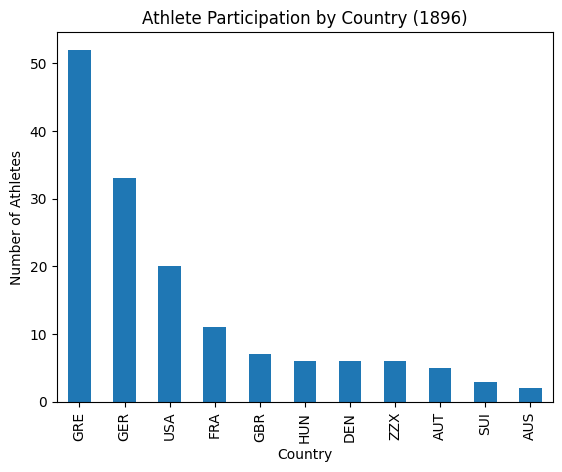

In [16]:
# Assuming your dataset has a column 'athlete' and 'country'
participation_counts = dataset['Country'].value_counts()

# Plotting athlete participation by country
participation_counts.plot(kind='bar', title='Athlete Participation by Country (1896)', ylabel='Number of Athletes', xlabel='Country')
plt.show()


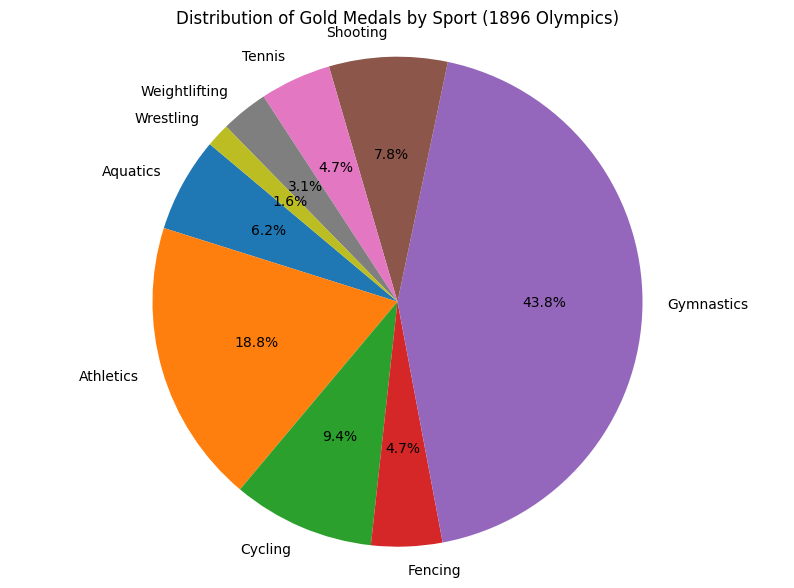

In [22]:


# Filter the dataset for gold medals
gold_medals = dataset[dataset['Medal'] == 'Gold']

# Group by sport and count the gold medals
gold_medal_counts = gold_medals.groupby('Sport')['Medal'].count()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(gold_medal_counts, labels=gold_medal_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gold Medals by Sport (1896 Olympics)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

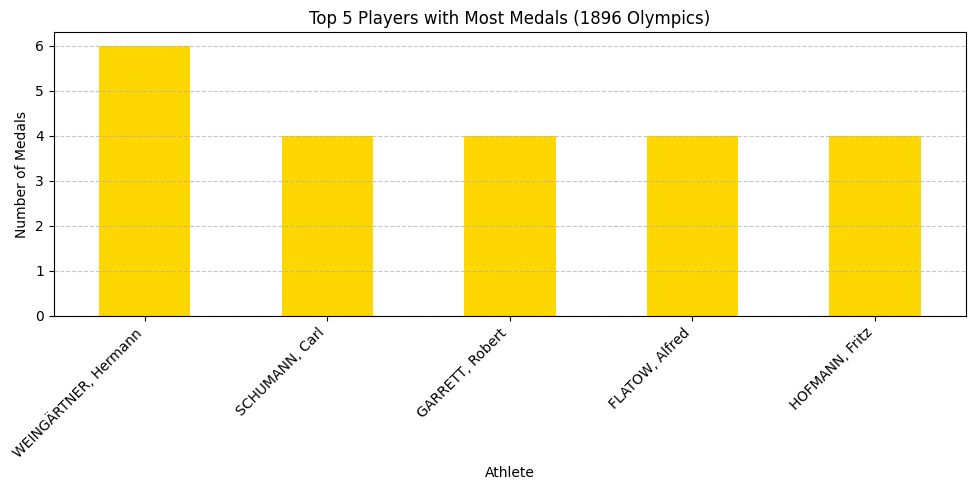

In [24]:
medal_counts = dataset.groupby('Athlete')['Medal'].count()

# Sort the medal counts in descending order and select the top 5 players
top_medalists = medal_counts.sort_values(ascending=False).head(5)

# Plotting the bar chart
plt.figure(figsize=(10, 5))
top_medalists.plot(kind='bar', color='gold')
plt.title('Top 5 Players with Most Medals (1896 Olympics)')
plt.ylabel('Number of Medals')
plt.xlabel('Athlete')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjusts the layout to make room for x-axis labels
plt.show()

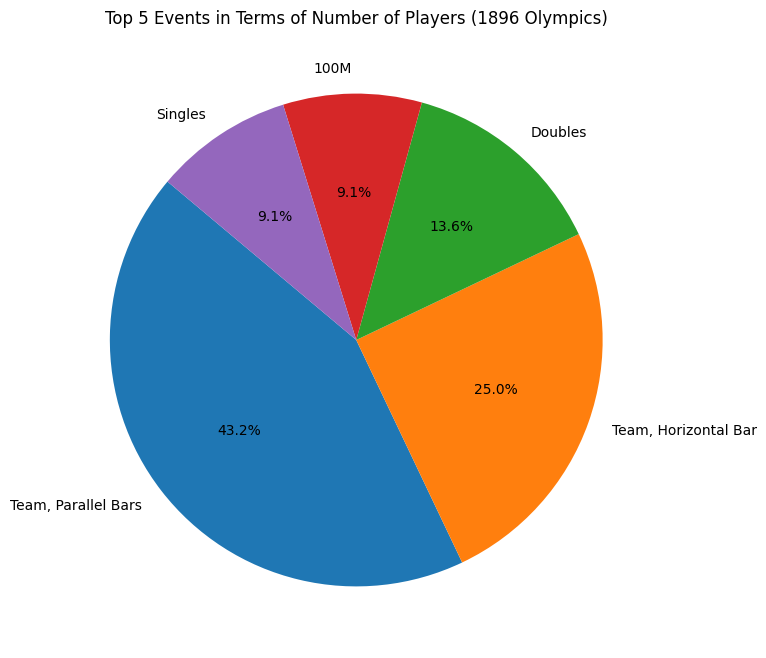

In [29]:
# Group by event and count the number of players
event_counts = dataset['Event'].value_counts()

# Get the top 5 events
top_5_events = event_counts.head(5)

# Prepare data for the pie chart
pie_data = top_5_events.values
pie_labels = top_5_events.index

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Events in Terms of Number of Players (1896 Olympics)')
plt.show()

Conclusion
This analysis of the 1896Summer  Olympics dataset provided valuable insights into various aspects of the inaugural modern Olympic Games. The following key findings were derived from the exploration:

Medal Distribution by Country: The bar chart depicting the medal distribution showcased which countries excelled in terms of medal counts. This highlights the competitive landscape of the 1896 Olympics and the countries that made a significant impact in the early years of the Games.

Event Participation: The distribution of events illustrated the variety of sports featured in the 1896 Olympics. This analysis indicates the level of interest and participation in different sports, which can serve as a basis for understanding how the Olympics evolved over time to include a broader range of events.

Athlete Participation by Country: The athlete participation analysis demonstrated the number of athletes representing different countries. This metric serves as an indicator of the countries' commitment to international competition and their investment in Olympic sports.

Gold Medal Distribution by Sport: The pie chart showing the distribution of gold medals across various sports revealed which sports were most successful for athletes in 1896. This information can help contextualize the significance of certain sports within the Olympic tradition and highlight areas that attracted the most elite competitors.

Top Medalists: The identification of the top five athletes with the most medals underscores individual excellence in the Games. This analysis not only celebrates these athletes but also reflects on the sports in which they competed, indicating the potential for future athletic stars and legends.

Top Events by Player Participation: The pie chart visualizing the top five events in terms of the number of players illustrates which events garnered the most interest and participation. This can inform future Olympic organizing committees about trends in athlete involvement and guide the development of future Olympic events.

Future Directions
Future analyses could delve deeper into factors influencing medal counts, such as economic investment in sports, training facilities, and historical contexts. Additionally, comparing the 1896 data with subsequent Olympic Games could reveal trends in sports popularity, athlete development, and national investments in athletics.

Overall, this project highlights the significance of data analysis in understanding the rich history of the Olympic Games and the continual evolution of sports on a global stage.